In [1]:
!wget --no-check-certificate https://platzi.com/clases/2565-redes-neuronales-tensorflow/42844-datasets-generators/

--2021-12-07 11:22:18--  https://platzi.com/clases/2565-redes-neuronales-tensorflow/42844-datasets-generators/
Resolviendo platzi.com (platzi.com)... 104.17.176.85, 104.17.175.85, 2606:4700::6811:b055, ...
Conectando con platzi.com (platzi.com)[104.17.176.85]:443... conectado.
Petición HTTP enviada, esperando respuesta... 403 Forbidden
2021-12-07 11:22:19 ERROR 403: Forbidden.



In [ ]:
import os 
import zipfile

local_zip="/home/usuario/Documentos/Platzi/Redes_neuronales/databasesLoadData/basedatos_1"

In [6]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import string
import tensorflow as tf

from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [7]:
train_dir="databasesLoadData/basedatos_1/sign-language-img/Train"
test_dir="databasesLoadData/basedatos_1/sign-language-img/Test"


Dado que una imagen a blanco y negro tiene 255 escals de colores
se normalizara usando ImageDataGenerator

con el parametro validation_split se toma un 20% de los datos
para validar

In [9]:
train_datagen=ImageDataGenerator(rescale=1/255)
test_datagen=ImageDataGenerator(rescale=1/255,validation_split=0.2)


Geradores se van a cargar desde un directorio con train_datagen.flow_form_directory()
y sus parametros son

-train_dir :direccion de la base de datos
-targers_size : eltamaño fijo de las imagenes
-batch_size : la cantidad de imagenes que van a ir juntas a entrenarse, mientras mas malo sea el pc mas bajo debe ser el barch_size
-class_mode="categorical"
-color_mode="grayscale"
-subset="trainig"



In [17]:
train_generator= train_datagen.flow_from_directory(
    train_dir,
    target_size=(28,28),
    batch_size=128,
    class_mode="categorical",
    color_mode="grayscale",
    subset="training"
)

validation_generator= test_datagen.flow_from_directory(
    test_dir,
    target_size=(28,28),
    batch_size=128,
    class_mode="categorical",
    color_mode="grayscale",
    subset="validation"
)

test_generator= test_datagen.flow_from_directory(
    test_dir,
    target_size=(28,28),
    batch_size=128,
    class_mode="categorical",
    color_mode="grayscale",
)

Found 27455 images belonging to 24 classes.
Found 1425 images belonging to 24 classes.
Found 7172 images belonging to 24 classes.


Se van a crear las clases

In [21]:
classes=[char for char in string.ascii_uppercase if char != "J" if char != "Z"]

['A',
 'B',
 'C',
 'D',
 'E',
 'F',
 'G',
 'H',
 'I',
 'K',
 'L',
 'M',
 'N',
 'O',
 'P',
 'Q',
 'R',
 'S',
 'T',
 'U',
 'V',
 'W',
 'X',
 'Y']

In [29]:
def plotImage(images_arr):
    fig, axes=plt.subplots(1,5,figsize=(10,10))
    axes=axes.flatten()
    for img ,ax in zip(images_arr,axes):
        ax.imshow(img[:,:,0])
        ax.axis("off")
    plt.tight_layout()
    plt.show()

IndexError: too many indices for array: array is 2-dimensional, but 3 were indexed

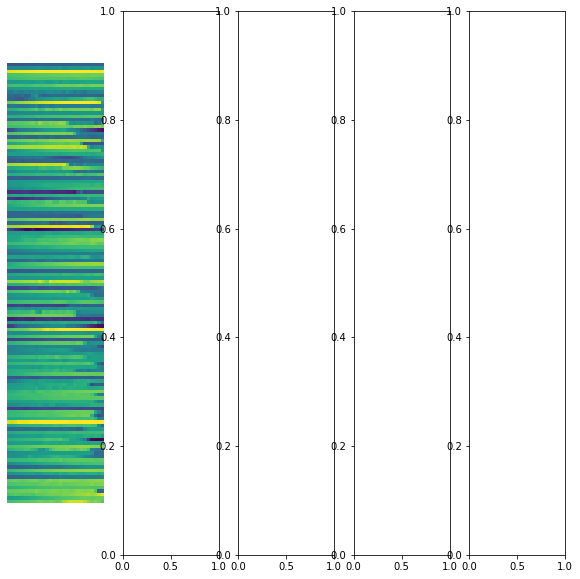

In [30]:
sample_training_image, _=next(train_generator)
plotImage(sample_training_image[:5])
